In [183]:
import numpy as np


# a row in X_train depicts a house as [area in sq ft, number of bedrooms, number of floors, age of house]
# each element of y_train corresponds to the price of the corresponding house in dollars
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])# [1130, 4, 2, 50], [1670, 3, 1, 44], [2890, 7, 2, 30], [220, 2, 8, 20]])
y_train = np.array([460, 232, 178])# 200, 289, 789, 92]) 

#### **Parameters of the Best model which is aimed to be obtained**

In [184]:
# defining model
# it is a linear regression model of form f(x1, x2, x3, x4) = w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + b

Best_model = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
Best_b = 785.1811367994083

##### **All training functions are written here**

##### Mean square Loss function is used

The Mean Squared Loss (or Mean Squared Error, MSE) is a common loss function used in regression problems. It measures the average squared difference between the predicted values and the actual values. The formula for Mean Squared Loss is given by:

$$ \[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \] $$

##### Gradient descent optimizer is used to update weights

Gradient Descent is an optimization algorithm commonly used in machine learning for minimizing a cost function. It iteratively adjusts the parameters of a model in the direction opposite to the gradient of the cost function with respect to the parameters.

The update rule for the parameters (\( \theta \)) in a single-variable case is given by:

$$ \[ \theta := \theta - \alpha \cdot \frac{dJ(\theta)}{d\theta} \] $$

And in the multi-variable case, where \( \theta \) is a vector:

$$ \[ \theta := \theta - \alpha \cdot \nabla J(\theta) \] $$

In [185]:
# Training functions

# MSE loss calculation
def calculateLoss(y_pred, y_true):
	m = y_pred.shape[0]
	loss = 0
	for i in range(m):
		loss += (y_pred[i] - y_true[i]) ** 2
	return loss / (2 * m)

def updateWeights(y_pred, y_true, x):
	n, m = x.shape
	dw = np.zeros(m)
	db = 0.0
	for i in range(n):
		for j in range(m):
			dw[j] += (y_pred[i] - y_true[i]) * x[i, j]
		db += (y_pred[i] - y_true[i])

	return dw / n, db / n

def runEpoch(x, y, model, b):
	n,m = x.shape
	y_pred = np.zeros(y.shape[0])
	for i in range(n):
		y_pred[i] = b + np.dot(model, x[i])

	return y_pred

##### **Training Hyperparameters**

In [186]:
# model training

N = 100000
Loss = []
LR = 5e-7
currentModel = np.zeros(4)
b = 0.0

for i in range(N):
	y_pred = runEpoch(x_train, y_train, currentModel, b)
	Loss.append(calculateLoss(y_pred, y_train))
	dw, db = updateWeights(y_pred, y_train, x_train)
	currentModel -= dw * LR
	b -= db * LR
	if i % 500 == 0:
		print(f"Loss at {i + 1} is: {Loss[-1]:8.2f}")

Loss at 1 is: 49518.00
Loss at 501 is:   691.78
Loss at 1001 is:   686.70
Loss at 1501 is:   681.85
Loss at 2001 is:   677.20
Loss at 2501 is:   672.75
Loss at 3001 is:   668.49
Loss at 3501 is:   664.41
Loss at 4001 is:   660.51
Loss at 4501 is:   656.78
Loss at 5001 is:   653.20
Loss at 5501 is:   649.78
Loss at 6001 is:   646.50
Loss at 6501 is:   643.36
Loss at 7001 is:   640.36
Loss at 7501 is:   637.48
Loss at 8001 is:   634.73
Loss at 8501 is:   632.09
Loss at 9001 is:   629.56
Loss at 9501 is:   627.14
Loss at 10001 is:   624.83
Loss at 10501 is:   622.61
Loss at 11001 is:   620.48
Loss at 11501 is:   618.45
Loss at 12001 is:   616.50
Loss at 12501 is:   614.63
Loss at 13001 is:   612.84
Loss at 13501 is:   611.12
Loss at 14001 is:   609.48
Loss at 14501 is:   607.90
Loss at 15001 is:   606.39
Loss at 15501 is:   604.95
Loss at 16001 is:   603.56
Loss at 16501 is:   602.23
Loss at 17001 is:   600.96
Loss at 17501 is:   599.73
Loss at 18001 is:   598.56
Loss at 18501 is:   597.4

#### **Results**

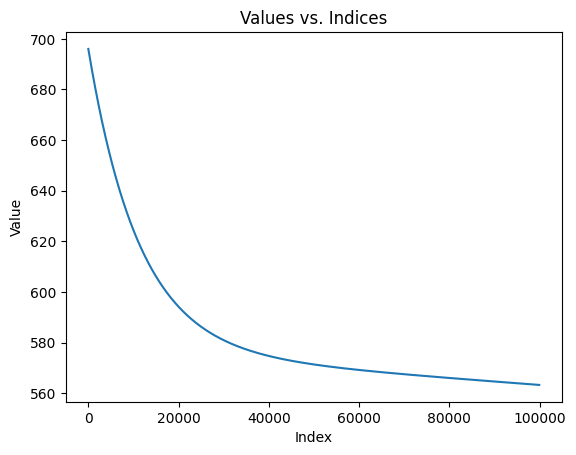

In [187]:
import matplotlib.pyplot as plt


# Plotting values w.r.t. indices
plt.plot(Loss[100:])

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Values vs. Indices')

# Display the plot
plt.show()
